In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve

In [31]:
df_x, df_y = load_breast_cancer(as_frame=True, return_X_y=True)
df_x = df_x[['mean radius', 'mean texture', 'mean area']]
df_x

,mean radius,mean texture,mean area
0,17.99,10.38,1001.0
1,20.57,17.77,1326.0
2,19.69,21.25,1203.0
3,11.42,20.38,386.1
4,20.29,14.34,1297.0
...,...,...,...
564,21.56,22.39,1479.0
565,20.13,28.25,1261.0
566,16.60,28.08,858.1
567,20.60,29.33,1265.0


In [32]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y)

In [34]:
model = LogisticRegression(penalty='none')
model.fit(X_train, Y_train)
print(f'Accuracy = {model.score(X_test, Y_test)}')
predictions = model.predict_proba(X_test)

Accuracy = 0.8531468531468531


In [35]:
predictions

array([[7.62151666e-02, 9.23784833e-01],
       [9.99971911e-01, 2.80891971e-05],
       [4.82444814e-01, 5.17555186e-01],
       [9.98944463e-01, 1.05553685e-03],
       [2.53423198e-01, 7.46576802e-01],
       [6.60432118e-02, 9.33956788e-01],
       [1.62360793e-02, 9.83763921e-01],
       [1.79388569e-02, 9.82061143e-01],
       [1.54813968e-01, 8.45186032e-01],
       [3.98109950e-02, 9.60189005e-01],
       [3.96024061e-01, 6.03975939e-01],
       [9.99926841e-01, 7.31593587e-05],
       [3.66286559e-02, 9.63371344e-01],
       [9.13717417e-01, 8.62825827e-02],
       [1.41171234e-02, 9.85882877e-01],
       [1.06132330e-02, 9.89386767e-01],
       [2.62975845e-01, 7.37024155e-01],
       [9.31127687e-01, 6.88723133e-02],
       [4.50149221e-02, 9.54985078e-01],
       [3.85223062e-02, 9.61477694e-01],
       [2.15905443e-02, 9.78409456e-01],
       [1.95568813e-01, 8.04431187e-01],
       [9.99999124e-01, 8.75789257e-07],
       [3.31775005e-02, 9.66822500e-01],
       [7.781030

In [88]:
number_bins = 5
bins = np.linspace(0, 1, number_bins + 1)
bin_midpoints = np.empty(number_bins)
for i in range(number_bins):
    bin_midpoints[i] = np.mean((bins[i], bins[i + 1]))
# Take the values for the class label 1.
predictions_binned = np.digitize(predictions[:, 1], bins, right=True)

In [93]:
observed_1s = np.empty(number_bins)
prob_pred = np.empty(number_bins)
for i, predicted_bin in enumerate(range(1, number_bins + 1)):
    # Find predictions in the specific bin.
    bin_mask = predictions_binned == predicted_bin
    # Now find out how many of observations in that bin belong to the first class.
    real = Y_test[bin_mask]
    # The first class in the model.predict is class 0 in df.
    ones = np.sum(real == 1)
    zeros = np.sum(real == 0)
    observed_1s_percent = ones / (ones + zeros)
    observed_1s[i] = observed_1s_percent
    # Calculate mean probability from predictions in a bin.
    prob_pred[i] = np.mean(predictions[:, 1][bin_mask])
(observed_1s, prob_pred)

(array([0.02777778, 0.66666667, 0.44444444, 0.64285714, 0.96      ]),
 array([0.02848406, 0.29832928, 0.50020963, 0.71629899, 0.94666103]))

In [78]:
calibration_curve(y_true=Y_test, y_prob=predictions[:, 1])

(array([0.02777778, 0.66666667, 0.44444444, 0.64285714, 0.96      ]),
 array([0.02848406, 0.29832928, 0.50020963, 0.71629899, 0.94666103]))

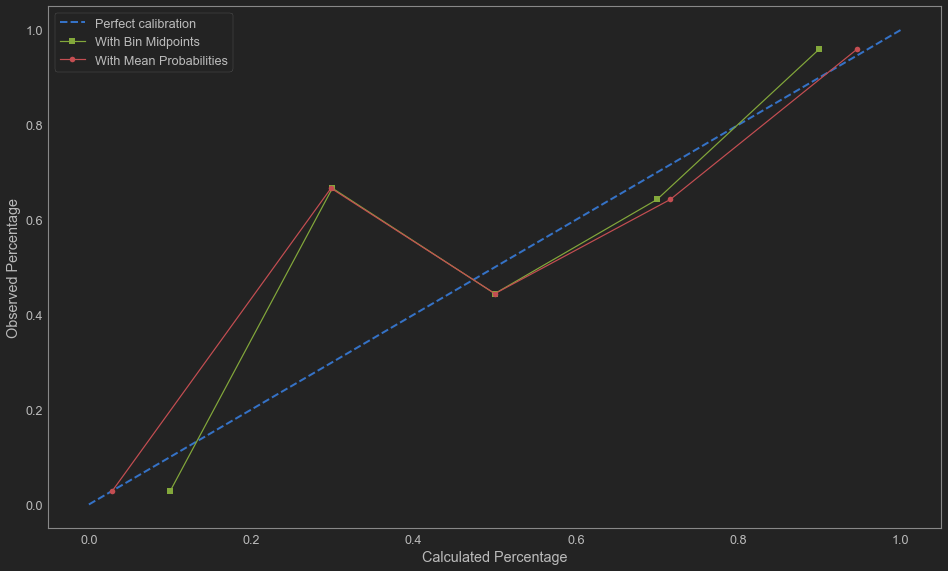

In [111]:
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=2, label='Perfect calibration')
plt.plot(bin_midpoints, observed_1s, marker='s', label='With Bin Midpoints')
plt.plot(prob_pred, observed_1s, marker='o', label='With Mean Probabilities')
plt.xlabel('Calculated Percentage')
plt.ylabel('Observed Percentage')
plt.legend();